# CSC529 Assignment 4
## Matt Triano

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import warnings
from IPython.display import display
from IPython.display import Image
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.pipeline import Pipeline

g_cmap = sns.light_palette('seagreen', n_colors=10, as_cmap=True)

In [2]:
data_raw = pd.read_csv('spambase.csv')
spam_labels = data_raw['spam']
data_df = data_raw.drop('spam', axis=1)
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data_df)
display(data_df.head(5))
display(spam_labels.head(5))
display(data_raw.shape)

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,wf_conference,cf_;,cf_(,cf_[,cf_!,cf_$,cf_#,crl_average,crl_longest,crl_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

(4601, 58)

In [3]:
data_raw.describe()

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,cf_;,cf_(,cf_[,cf_!,cf_$,cf_#,crl_average,crl_longest,crl_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


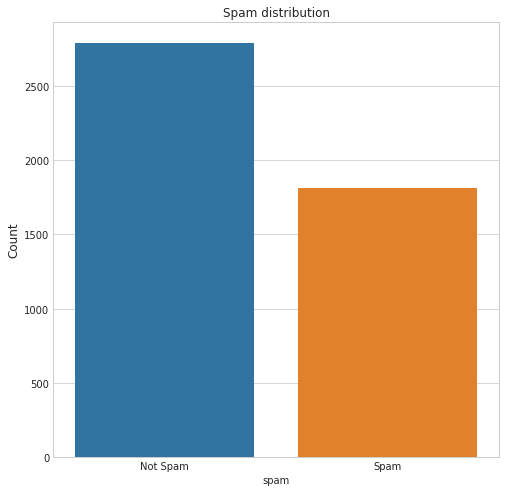

In [4]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax0 = plt.subplots(nrows=1, ncols=1,figsize=(8,8))
    sns.countplot(x='spam', data=data_raw, ax=ax0)
    ax0.set_ylabel('Count', fontsize=12)
    ax0.set_xticklabels(['Not Spam', 'Spam'])    
    ax0.set_title('Spam distribution')

In [57]:
def print_clf_grid_stats(grid_clf, gamma=False, wantPrint=True):
    print('C value that produces the most accurate model: {}'.format(grid_clf.best_params_))
    print('Score of the most accurate model: {:.6f} \n'.format(grid_clf.best_score_))
    means = grid_clf.cv_results_['mean_test_score']
    stdevs = grid_clf.cv_results_['std_test_score']
    c_list_ = []
    g_list_ = []
    if wantPrint:
        print('   --- Mean accuracy (+/- standard deviation) for different C values ---')
    for mean, stdev, param in zip(means, stdevs, grid_clf.cv_results_['params']):
        c_list_.append(param['C'])
        if gamma:
            g_list_.append(param['gamma'])
        if wantPrint:
            print('{:0.3f} (+/- {:0.3f}) for the model with parameters {}'
                  .format(mean, stdev, param))
    return means, stdevs, c_list_, g_list_

In [58]:
# Apparently Seaborn's tsplot will be deprecated, so I made just made a similar
#  plot using matplotlib (Seaborn is just a nice wrapper for matplotlib anyway)
def errorbar_lineplot(ax, x, y, stdev, **kw):
    c_intervals = (y - stdev, y + stdev)
    ax.fill_between(x, c_intervals[0], c_intervals[1], alpha=0.2, **kw)
    ax.plot(x, y, **kw)

In [59]:
param_lin = [
  {'C': [5e-05, 5e-04, 1e-03, 5e-03, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
         0.08, 0.09, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1, 1.5, 2, 5, 10, 20],
  'loss': ['hinge']}
]
svm_clf = LinearSVC()

In [60]:
# linsvm_pipe_clf = Pipeline(steps=[('scaler', StandardScaler()),
#                                   ('linsvm_clf', LinearSVC())])

In [61]:
svm_lin_clf_grid = GridSearchCV(svm_clf, param_lin, verbose=9, cv=10, n_jobs=-1)

%time svm_lin_clf_grid.fit(scaled_data_df, spam_labels.values)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:   11.1s


Wall time: 16 s


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   15.5s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [5e-05, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1, 1.5, 2, 5, 10, 20], 'loss': ['hinge']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=9)

In [62]:
lin_means, lin_stdevs, lin_Cs,_ = print_clf_grid_stats(svm_lin_clf_grid,
                                                      wantPrint=True)
# svm_lin_clf_grid.best_params_
# svm_lin_clf_grid.cv_results_['param_linsvm_clf__C']

C value that produces the most accurate model: {'C': 0.03, 'loss': 'hinge'}
Score of the most accurate model: 0.921539 

   --- Mean accuracy (+/- standard deviation) for different C values ---
0.891 (+/- 0.044) for the model with parameters {'C': 5e-05, 'loss': 'hinge'}
0.887 (+/- 0.027) for the model with parameters {'C': 0.0005, 'loss': 'hinge'}
0.895 (+/- 0.023) for the model with parameters {'C': 0.001, 'loss': 'hinge'}
0.912 (+/- 0.019) for the model with parameters {'C': 0.005, 'loss': 'hinge'}
0.915 (+/- 0.021) for the model with parameters {'C': 0.01, 'loss': 'hinge'}
0.918 (+/- 0.022) for the model with parameters {'C': 0.02, 'loss': 'hinge'}
0.922 (+/- 0.023) for the model with parameters {'C': 0.03, 'loss': 'hinge'}
0.912 (+/- 0.028) for the model with parameters {'C': 0.04, 'loss': 'hinge'}
0.913 (+/- 0.028) for the model with parameters {'C': 0.05, 'loss': 'hinge'}
0.912 (+/- 0.030) for the model with parameters {'C': 0.06, 'loss': 'hinge'}
0.913 (+/- 0.029) for the model

In [40]:
# lin_means = svm_lin_clf_grid.cv_results_['mean_test_score']
# lin_stdevs = svm_lin_clf_grid.cv_results_['std_test_score']
# lin_Cs = svm_lin_clf_grid.cv_results_['param_linsvm_clf__C']

In [46]:
# lin_dict = {'mean_acc': lin_means,
#             'stdevs':lin_stdevs,
#             'C': lin_Cs}
# lin_df = pd.DataFrame(lin_dict)
# lin_df['C']

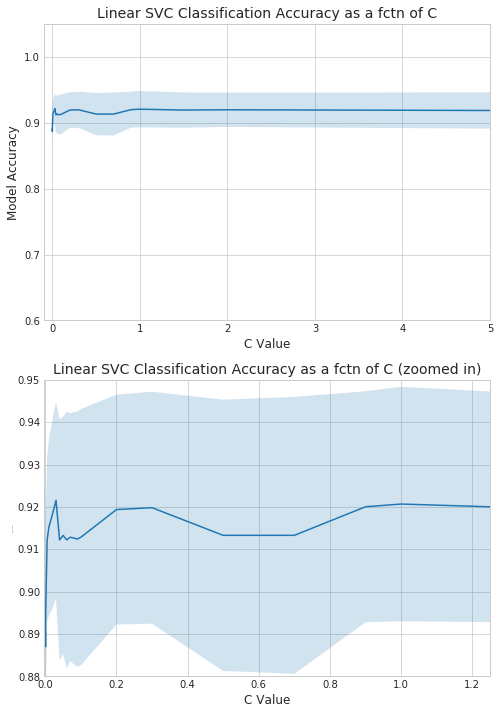

In [64]:
with plt.style.context('seaborn-whitegrid'):
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=False, figsize=(8,12))
    errorbar_lineplot(ax1, lin_Cs, lin_means, lin_stdevs)
    ax1.set_xlabel('C Value', fontsize=12)
    ax1.set_ylabel('Model Accuracy', fontsize=12)
    ax1.set_ylim([0.6,1.05])
    ax1.set_xlim([-0.1,5])
    ax1.set_title('Linear SVC Classification Accuracy as a fctn of C', fontsize=14)
    errorbar_lineplot(ax2, lin_Cs, lin_means, lin_stdevs)
    ax2.set_xlabel('C Value', fontsize=12)
    ax2.set_ylabel('Model Accuracy', fontsize=1)
    ax2.set_ylim([0.88,0.95])
    ax2.set_xlim([-0.005,1.25])
    ax2.set_title('Linear SVC Classification Accuracy as a fctn of C (zoomed in)', fontsize=14)

In [65]:
# lin_piv = lin_df.pivot(index='C', values='mean_acc', columns='C')
# with plt.style.context('seaborn-whitegrid'):
#     fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
#     ax = sns.heatmap(rbf_mean_piv, linewidths=0.5, annot=True, fmt='0.3f')
#     ax.set_title('RBF SVC Accuracy for Different Values of C and Sigma', fontsize=16)

In [66]:
# with plt.style.context('seaborn-whitegrid'):
#     fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=False, figsize=(8,12))
#     errorbar_lineplot(ax1, lin_df['C'], lin_df['mean_acc'], lin_df['stdevs'])
#     ax1.set_xlabel('C Value', fontsize=12)
#     ax1.set_ylabel('Model Accuracy', fontsize=12)
#     ax1.set_ylim([0.6,1.05])
#     ax1.set_xlim([-0.1,5])
#     ax1.set_title('Linear SVC Classification Accuracy as a fctn of C', fontsize=14)
#     errorbar_lineplot(ax2, lin_Cs, lin_means, lin_stdevs)
#     ax2.set_xlabel('C Value', fontsize=12)
#     ax2.set_ylabel('Model Accuracy', fontsize=1)
#     ax2.set_ylim([0.88,0.95])
#     ax2.set_xlim([-0.005,1.25])
#     ax2.set_title('Linear SVC Classification Accuracy as a fctn of C (zoomed in)', fontsize=14)

In [67]:
param_rbf = [
  {'C': [0.01, 0.1, 1, 10, 35, 50, 65, 100, 250, 500], 
   'gamma': [5e-05, 1e-04, 5e-04, 1e-03, 5e-03, 0.01, 0.05, 0.1, 0.5]
  }]
rbf_svm_clf = SVC()

In [30]:
svm_rbf_clf_grid = GridSearchCV(rbf_svm_clf, param_rbf, verbose=9, cv=3, n_jobs=-1)

%time svm_rbf_clf_grid.fit(scaled_data_df, spam_labels)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.3min finished


Wall time: 1min 16s


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 35, 50, 65, 100, 250, 500], 'gamma': [5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=9)

In [39]:
rbf_means, rbf_stdevs, rbf_Cs, rbf_gammas = \
                                print_clf_grid_stats(svm_rbf_clf_grid, 
                                                     gamma=True, 
                                                     wantPrint=False)

C value that produces the most accurate model: {'C': 50, 'gamma': 0.001}
Score of the most accurate model: 0.926538 



In [40]:
gamma2sigma = lambda x: np.sqrt(1/(2*x))
sigmafier = np.vectorize(gamma2sigma)
sigma_list = sigmafier(rbf_gammas)

In [41]:
sigma_list

array([ 100.        ,   70.71067812,   31.6227766 ,   22.36067977,
         10.        ,    7.07106781,    3.16227766,    2.23606798,
          1.        ,  100.        ,   70.71067812,   31.6227766 ,
         22.36067977,   10.        ,    7.07106781,    3.16227766,
          2.23606798,    1.        ,  100.        ,   70.71067812,
         31.6227766 ,   22.36067977,   10.        ,    7.07106781,
          3.16227766,    2.23606798,    1.        ,  100.        ,
         70.71067812,   31.6227766 ,   22.36067977,   10.        ,
          7.07106781,    3.16227766,    2.23606798,    1.        ,
        100.        ,   70.71067812,   31.6227766 ,   22.36067977,
         10.        ,    7.07106781,    3.16227766,    2.23606798,
          1.        ,  100.        ,   70.71067812,   31.6227766 ,
         22.36067977,   10.        ,    7.07106781,    3.16227766,
          2.23606798,    1.        ,  100.        ,   70.71067812,
         31.6227766 ,   22.36067977,   10.        ,    7.07106

In [64]:
rbf_mean_dict = {'mean_acc': rbf_means,
                 'sigma':sigma_list,
                 'C': rbf_Cs}
rbf_mean_df = pd.DataFrame(rbf_mean_dict)

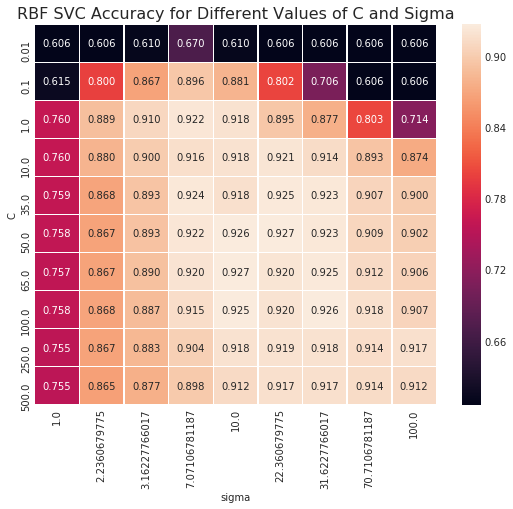

In [69]:
rbf_mean_piv = rbf_mean_df.pivot(index='C', values='mean_acc', columns='sigma')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
    ax = sns.heatmap(rbf_mean_piv, linewidths=0.5, annot=True, fmt='0.3f')
    ax.set_title('RBF SVC Accuracy for Different Values of C and Sigma', fontsize=16)

### RBF SVC Analysis



Aside: I just discovered what Pipeline does and it solves one of my main roadblocks on my final project. If you aren't familiar, you can enter a sequence of preprocessing steps into a Pipeline and it will allow you to automatically keep the testing and training sets isolated even when invoking preprocessing. 

In [8]:
svm_pipe_clf = Pipeline(steps=[('scaler', StandardScaler()),
                               ('svm_clf', SVC())])

In [51]:
param_nonlin = [
    {'svm_clf__kernel': ['poly'],
    'svm_clf__degree': [1,1.5,2,2.5,3],
    'svm_clf__C': [0.01, 1, 2, 3, 5]}
]

In [52]:
svm_poly_grid = GridSearchCV(svm_pipe_clf, param_nonlin, cv=10, n_jobs=-1, verbose=9)

%time svm_poly_grid.fit(data_df, spam_labels)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.6min finished


Wall time: 2min 34s


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'svm_clf__degree': [1, 1.5, 2, 2.5, 3], 'svm_clf__kernel': ['poly'], 'svm_clf__C': [0.01, 1, 2, 3, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=9)

In [61]:
# svm_poly_grid.cv_results_['param_svm_clf__C'].data
# svm_poly_grid.cv_results_['params']
print('Best Polynomial SVC score: {:0.4f} \nBest Params: {}'
      .format(svm_poly_grid.best_score_, svm_poly_grid.best_params_))

Best Polynomial SVC score: 0.9178 
Best Params: {'svm_clf__C': 1, 'svm_clf__kernel': 'poly', 'svm_clf__degree': 1}


In [54]:
poly_dict = {'mean_acc': svm_poly_grid.cv_results_['mean_test_score'], 
                 'degree': svm_poly_grid.cv_results_['param_svm_clf__degree'].data,
                 'C': svm_poly_grid.cv_results_['param_svm_clf__C'].data}
poly_df = pd.DataFrame(poly_dict)

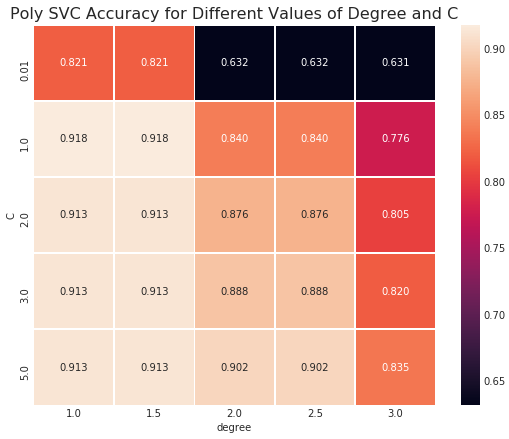

In [66]:
poly_piv = poly_df.pivot(index='C', values='mean_acc', columns='degree')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
    ax = sns.heatmap(poly_piv, linewidths=0.5, annot=True, fmt='0.3f')
    ax.set_title('Poly SVC Accuracy for Different Values of Degree and C', fontsize=16)

In [62]:
best_poly_pipe_clf = Pipeline(steps=[('scaler', StandardScaler()),
                                     ('svm_clf', SVC(kernel='poly', C=1.0, degree=0.1))])

## 1b: AdaBoost

In [68]:
d_stumps = DecisionTreeClassifier(max_depth=1)

param_ada = {
    'base_estimator': [d_stumps],
    'n_estimators': [100],
    'algorithm': ['SAMME.R'],
    'learning_rate': [0.3, 0.5, 0.7]
}

ada_clf = AdaBoostClassifier()
# ada_clf = ada_clf.fit(X_train, y_train)

In [69]:
ada_clf_grid = GridSearchCV(ada_clf, param_ada, verbose=9, cv=10, n_jobs=-1)

%time ada_clf_grid.fit(scaled_data_df, spam_labels)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   13.2s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   13.3s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   14.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.8s finished


Wall time: 16.1 s


GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')], 'learning_rate': [0.3, 0.5, 0.7], 'algorithm': ['SAMME.R'], 'n_estimators': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=9)

In [70]:
# ada_clf_grid.cv_results_['mean']
# print_clf_grid_stats(ada_clf_grid)
ada_means = ada_clf_grid.cv_results_['mean_test_score']
ada_stdevs = ada_clf_grid.cv_results_['std_test_score']
display(ada_means)
display(ada_stdevs)
ada_clf_grid.best_params_

array([ 0.93327537,  0.93371006,  0.93327537])

array([ 0.03941998,  0.03790285,  0.03744828])

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'learning_rate': 0.5,
 'n_estimators': 100}

In [71]:
def print_ada_grid_stats(ada_grid, wantPrint=True):
    print('C value that produces the most accurate model: {}'.format(ada_grid.best_params_))
    print('Score of the most accurate model: {:.6f} \n'.format(ada_grid.best_score_))
    means_ = ada_grid.cv_results_['mean_test_score']
    stdevs_ = ada_grid.cv_results_['std_test_score']
    c_list_ = []
    g_list_ = []
    if wantPrint:
        print('   --- Mean accuracy (+/- standard deviation) for different C values ---')
    for mean, stdev, param in zip(means, stdevs, grid_clf.cv_results_['params']):
        c_list_.append(param['C'])
        if gamma:
            g_list_.append(param['gamma'])
        if wantPrint:
            print('{:0.3f} (+/- {:0.3f}) for the model with parameters {}'
                  .format(mean, stdev, param))
    return means_, stdevs_, c_list_, g_list_

In [8]:
# help(AdaBoostClassifier)
# help(DecisionTreeClassifier)
# help(d_stumps)

## 2: Questions

### 2a: Decision Boundaries

A decision boundary is some manifold/surface in the data space that tries to accurately separate datapoints of different classes. 
* In a binary SVM classifier, the hyperplane that divides the bulk of one class from the bulk of another.
* In a decision tree classifier (with binary splits), at every node of the decision tree there is a feature-value ($D_V$) that is used to sort all datapoints on that branch. All datapoints where their value for that feature exceeds $D_V$ go to one branch and all other datapoints fo to the other branch.

### 2b: Bayes Decision Theory

Prior Probability captures the expectation that an observer could reach using the relevant information that was available to them. I frequently use the phrase "prepare to adjust your priors" when presenting new, striking information to the nerds I associate with.

### 2c: Zero-One Loss Function

$$\lambda(\alpha_i|\omega_j) := \left\{
    \begin{array}{rcl}
        0 & \mbox{for} & i = j \\
        1 & \mbox{for} & i \neq j \\
    \end{array} \;\; \mbox{for} \; i,j = 1, ..., c
\right.$$

The **Zero-One Loss Function** states that for any incorrect classification (whether it's a false positive or false negative), the loss is complete ($1$), and for correct classifications, there is no loss ($0$) of accuracy. This is the loss function typically used in binary classifications. 

### 2d: Evaluation Metrics for Probabilistic Classifiers

* 

## Bayesian Networks

### 3a:
$$P(X)*P(Y|X)*P(Z|X,Y)*P(W|X,Y,Z)$$
<img src="3a.PNG" alt="Drawing" style="width: 400px;"/>

### 3b:
$$P(W)*P(X)*P(Y)*P(Z)$$
<img src="3b.PNG" alt="Drawing" style="width: 400px;"/>

### 3c:
$$P(Y)*P(Z|Y)*P(X|Y)*P(W|Y)$$
<img src="3c.PNG" alt="Drawing" style="width: 400px;"/>

### 3d:
$$P(Z|X,Y)*P(X)*P(Y)*P(W|X)$$
<img src="3d.PNG" alt="Drawing" style="width: 400px;"/>

### 3e:
$$P(W|X)*P(X|Y)*P(Y|Z)*P(Z)$$
<img src="3e.PNG" alt="Drawing" style="width: 400px;"/>

### 3f:
$$P(W|X)*P(Y|X)*P(Z|Y)*P(X)$$
<img src="3f.PNG" alt="Drawing" style="width: 400px;"/>

In [ ]:
# LinearSVC().get_params().keys()
# help(sns.countplot)
# <markdown> ![Directed Graph for 3a](3a.png)